<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#インストールについて" data-toc-modified-id="インストールについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>インストールについて</a></span></li><li><span><a href="#What-is-PyTorch" data-toc-modified-id="What-is-PyTorch-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is PyTorch</a></span><ul class="toc-item"><li><span><a href="#演算" data-toc-modified-id="演算-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>演算</a></span></li></ul></li><li><span><a href="#AUTOGRAD:-AUTOMATIC-DIFFERENTIATION" data-toc-modified-id="AUTOGRAD:-AUTOMATIC-DIFFERENTIATION-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AUTOGRAD: AUTOMATIC DIFFERENTIATION</a></span></li><li><span><a href="#ニューラルネットワーク" data-toc-modified-id="ニューラルネットワーク-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ニューラルネットワーク</a></span><ul class="toc-item"><li><span><a href="#かんたんなネットワークを構築する" data-toc-modified-id="かんたんなネットワークを構築する-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>かんたんなネットワークを構築する</a></span></li><li><span><a href="#損失関数" data-toc-modified-id="損失関数-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>損失関数</a></span></li></ul></li><li><span><a href="#TRAINING-A-CLASSIFIER" data-toc-modified-id="TRAINING-A-CLASSIFIER-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>TRAINING A CLASSIFIER</a></span><ul class="toc-item"><li><span><a href="#Loading-and-normalizing-CIFAR10" data-toc-modified-id="Loading-and-normalizing-CIFAR10-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Loading and normalizing CIFAR10</a></span></li><li><span><a href="#Define-a-Convolutional-Neural-Network" data-toc-modified-id="Define-a-Convolutional-Neural-Network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Define a Convolutional Neural Network</a></span></li><li><span><a href="#Define-a-Loss-function-and-optimizer" data-toc-modified-id="Define-a-Loss-function-and-optimizer-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Define a Loss function and optimizer</a></span></li><li><span><a href="#Train-the-network" data-toc-modified-id="Train-the-network-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Train the network</a></span></li><li><span><a href="#Test-the-network-on-the-test-data" data-toc-modified-id="Test-the-network-on-the-test-data-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Test the network on the test data</a></span></li><li><span><a href="#Training-on-GPU" data-toc-modified-id="Training-on-GPU-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Training on GPU</a></span></li></ul></li></ul></div>

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
import cv2

## インストールについて

公式を参考にそのままやったらかなり躓いたのでメモしておく。

公式ではPyTorchやCUDAのバージョンを選択してインストール用のコマンドを生成してくれるが、
これでやってしまうとうまくインストールできなかった。  
(`import torch`すると、`DLL load failed`となってしまった)

おそらくだけど、これを行った時点ではPyTorchの最新バージョンは1.3.0だが、
まだWindowsに対応していないのでは?
対策として一つ前のバージョンである1.2.0を入れることにした。

また、前のバージョンである1.2.0を、これも公式のとおりにインストールしたら
CUDA9に対応したPyTorchが入ってしまった。
(以下のコマンド)

```
pip install torch==1.2.0 torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
```

以下のページを参考にしながら、次のように行うことで、
CUDA10を使用したPyTorch Ver1.2をインストールすることができた。

```
pip3 install https://download.pytorch.org/whl/cu100/torch-1.2.0-cp36-cp36m-win_amd64.whl

pip3 install https://download.pytorch.org/whl/cu100/torchvision-0.4.0-cp36-cp36m-win_amd64.whl
```

これをPipfileのscriptに書いておいたので、あとからでもインストールできると思う。

---

**参考**

- [1](https://discuss.pytorch.org/t/getting-cuda-version-9-0-17-but-nvcc-shows-the-cuda-version-to-be-10-0-130/48300)
- [2](https://drumato.hatenablog.com/entry/2019/01/13/104206)

---

In [4]:
import torch

x = torch.rand(5, 3)
print(x)

tensor([[0.3326, 0.6948, 0.0352],
        [0.1532, 0.1289, 0.8538],
        [0.1688, 0.0574, 0.1348],
        [0.1047, 0.1282, 0.8588],
        [0.1623, 0.9180, 0.1592]])


In [5]:
if torch.cuda.is_available():
    print(f"CUDA version using in PyTorch is {torch.version.cuda}")

## What is PyTorch

変数やテンソルの生成、扱い方など。。

In [6]:
x = torch.empty(5, 3)
x = torch.zeros(5, 3)
x = torch.rand(5, 3)
x = torch.randn(5, 3)
x = torch.ones(5, 3)

- `empty`
- `zeros`
- `ones`
- `rand`
- `randn`

### 演算

例えば足し算は`+`演算子でもできるし、`tensor`がもっている`add`メソッドでもできる。

`tensor`自身に足した結果を格納したい場合には、`postfix`に`_`をつけたメソッドを呼び出せばよい。
足し算の場合には、`add_`メソッドとなる。
足し算以外の他の演算メソッドでもこの法則は同様。

また、`postfir`に`_like`とあるものは、入力にtensorをとり、
その形状と同じtensorを返す。

In [7]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

print(f"x + y = \n{x + y}")

print(f"x = \n{x.add_(y)}")

x + y = 
tensor([[0.5064, 0.8020, 1.5279],
        [1.3643, 0.9701, 1.5644],
        [0.7919, 1.6548, 0.6321],
        [0.1721, 1.2893, 1.3651],
        [0.9196, 0.5909, 1.3498]])
x = 
tensor([[0.5064, 0.8020, 1.5279],
        [1.3643, 0.9701, 1.5644],
        [0.7919, 1.6548, 0.6321],
        [0.1721, 1.2893, 1.3651],
        [0.9196, 0.5909, 1.3498]])


In [8]:
print(torch.rand_like(x))

tensor([[0.3157, 0.8639, 0.7970],
        [0.5824, 0.0929, 0.1165],
        [0.1699, 0.1246, 0.2976],
        [0.3069, 0.2192, 0.0228],
        [0.3056, 0.3595, 0.4127]])


In [9]:
# numpy-likeにスライスすることも可能
print(f"The 1st row of x:\n{x[0,:]}")

The 1st row of x:
tensor([0.5064, 0.8020, 1.5279])


チュートリアルでは紹介しきれない演算子が多くある。
(例えば、transposeやslicing、代数演算など)

それらの詳細は以下にすべてまとまっているので、適宜参考にすること。

[docs](https://pytorch.org/docs/stable/torch.html)

In [10]:
# tensorをndarrayに変換可能

a = torch.ones(5)
b = a.numpy()
print(f"numpy-converted obj: {b}")

a.add_(1)

print(f"the converted obj reference the same obejct.")
print(f"numpy-converted obj: {b}")

numpy-converted obj: [1. 1. 1. 1. 1.]
the converted obj reference the same obejct.
numpy-converted obj: [2. 2. 2. 2. 2.]


## AUTOGRAD: AUTOMATIC DIFFERENTIATION

参考ページ:[ここ](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)

In [82]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [83]:
z = y * y * 3
# out = z.mean()

# print(z, out)

上記のように`requires_grad`属性を`True`にしたいtensorに対して演算を行うと、
その演算に対する微分情報が得られる。

In [69]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


以上の結果は、`out`を`x`で偏微分したもの、つまりはヤコビアン。
(`out`は`x`の関数。)

計算過程を詳説すると、以下のとおり。

---
`out`を$\boldsymbol{o}$ と表記すると、$\boldsymbol{o} = \frac{1}{4} \sum 3(\boldsymbol{x} +2)^2$となる。

これを$\boldsymbol{x}$ で微分したものが上記となる。

$\frac{\boldsymbol{o}}{x_i} = \frac{3}{2}(x_i + 2)$である。$x_i = 1$のとき、これは4.5となる。

よって、上記のような計算結果となる。

---

In [98]:
x = torch.ones(2, 2, requires_grad=True)
y = 2 * x ** 4 + 5

y.backward(torch.ones(2, 2))
print(x.grad)

tensor([[8., 8.],
        [8., 8.]])


ベクトル$\boldsymbol{y}$に対して、ベクトル$\boldsymbol{x}$の各要素で偏微分したものはヤコビ行列(ヤコビアン)と呼ばれる。

一般に、`torch.autograd`はヤコビアンと行列の積を求める計算エンジンである。

つまり、任意のベクトル$\boldsymbol{v}$が与えられた場合、$\boldsymbol{v}^\mathrm{T} \cdot \boldsymbol{J}$が計算される。

仮に$\boldsymbol{v}$がスカラー量$l = f(\boldsymbol{y})$の勾配であった場合、つまり、
$\boldsymbol{v} = \{ \frac{\partial{l}}{\partial{y_1}},...,  \frac{\partial{l}}{\partial{y_n}}\}^\mathrm{T}$
である場合、**連鎖律(chain rule)** によって、
ベクトル-ヤコビアンの積は、スカラー量$l$を$\boldsymbol{x}$で微分したものとなる。

$$
\boldsymbol{J}^\mathrm{T} \cdot \boldsymbol{v} = \{ \frac{\partial{l}}{\partial{x_1}},...,  \frac{\partial{l}}{\partial{x_m}}\}^\mathrm{T}
$$

## ニューラルネットワーク

Pytorchでは`torch.nn`パッケージを用いてニューラルネットワークを構築していく。

ニューラルネットワークのトレーニングの主な流れは以下のとおり。

- ネットワークを構築する
- 入力データを入れる
- 損失を計算する
- backprop計算
- ネットワーク内の重みを更新

本章では、この流れの基本的な操作について実行していく。

### かんたんなネットワークを構築する

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # 1層目
        # 1チャンネルの画像データを入力
        # 出力には6チャンネルのデータとなる
        # カーネルサイズは3x3
        # 注: 畳み込み層では出力画像のサイズを指定しない。
        # (サイズはカーネルサイズやPoolong層、パディングによって自動的に決まる)
        self.conv1 = nn.Conv2d(1, 6, 3)
        
        # 2層目
        # 6チャンネルのデータを入力
        # 出力には16チェンネルのデータとなる
        # カーネルサイズは3x3
        self.conv2 = nn.Conv2d(6, 16, 3)
        
        # 3層目以降は全結合層(アフィン層とも)
        # 入力は16チャンネルの6x6の２2次元データで、
        # 120行の出力を出す
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        # 以降は同様
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling8(2x2)をかます
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # Pooling範囲が正方であるならば数字単独でもOK
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # フラット化する
        x = x.view(-1, self.num_flat_features(x))
        # あとは残りのAffine層に突っ込む
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

    def num_flat_features(self, x):
        # all dimensions except the batch dimension
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [12]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


`forward()`を定義したが、`backward`は定義していない。

これについては、`forward`の処理から自動的に決まるので、
あとは`autograd`がやってくれる。

ユーザーは好きに`forward()`内の演算を定義するだけでよい。

`parameters()`で重みを取得できる。

以下では試しに1層目の重みのサイズをprintしている。

1チャンネルの画像データに対して、(3x3)のカーネルを適用して、
6チャンネルのデータを出力する重みとなっていることがわかる。

In [13]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [14]:
# 適当な値で値を出力してみる。
data_input = torch.randn(1, 1, 32, 32)
data_out = net(data_input)
print(data_out)

tensor([[-0.0416, -0.0682, -0.0028,  0.0812, -0.0448, -0.0658,  0.1451, -0.0497,
          0.0973, -0.0796]], grad_fn=<AddmmBackward>)


[Caution]

- `tourch.nn`はミニバッチデータのみを受け付ける
    - 入力データの形状は`nSamples x nChannels x Height x Width`
    - なので、上記の適当データでもshapeが(1, 1, 32, 32)としている

### 損失関数

以上がニューラルネットワークを構築するまでの処理。
構築したニューラルネットワークは、2層の畳み込み層と、3層のAffine層。
そして、ランダムなデータを入力して、順伝播して出力を得た。

このニューラルネットワークを学習させることになるが、
そのためにはその指標である損失関数を計算する必要がある。

`nn`パッケージにはいくつかの損失関数が存在する。
最もシンプルなのが、`nn.MSELoss`(*mean square error*)

In [47]:
data_out = net(data_input)
target = torch.randn(10)
target = target.view(1, -1)

criterion = nn.MSELoss()
# data_outがネットワークからの出力
# targetが教師データに相当する
loss = criterion(data_out, target)
print(loss)

tensor(0.4094, grad_fn=<MseLossBackward>)


In [39]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

`loss.backward()`を実行すると、計算グラフ全体が損失関数に対して偏微分され、
計算グラフ中のすべてのテンソル(`required_grad=True`であるテンソル)は、
勾配が蓄積されてきた`.grad`テンソルをもつことになる。

backwardを計算する前に、勾配をゼロで初期化する必要がある。
(勾配情報がそれまでの値に加算されていくので、ゼロ初期化しておかないと値がおかしくなる。)

In [48]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0023, -0.0053,  0.0072, -0.0006, -0.0024, -0.0043])


重みの更新について

`Net`の`parameters`属性に、各層のパラメータについての情報がある。
各`parameters`の`data`属性に実際の重み行列となっている。

これを学習率と勾配から更新する。

In [49]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

重み更新方法には様々な方法がある。

- Adam
- RMS-prop
- SGD

PyTorchでは、これらを簡易に使用できるようになっている。

In [55]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
data_out = net(data_input)

criterion = nn.MSELoss()
loss = criterion(data_out, target)
net.zero_grad()
loss.backward()
optimizer.step()    # Does the update

## TRAINING A CLASSIFIER

データには様々なタイプがある。

- 画像データ
- 音声データ
- テキストデータ、などなど

これらをロードするパッケージはいくつかある。(例えばOpenCVなど)

画像に関して言えば、`tourchvision`パッケージを使うのがおすすめ。

これには、データセット(ImagenetやCIFAR10, MNISTなど)のデータロードが簡単にできる
`tourch.datasets`や、
画像データの変換機能である`tourch.utils.data.DataLoader`といった機能がある。

これらを使用することで、定型コードを減らしたよりシンプルなコードを書くことができる。

---

このチュートリアルでは、CIFAR10データセットを使用することにする。

以下のステップを実行していく。

- `torchvision`を用いてCIFAR10のデータセットをロードし、正規化する
- CNNを構築する
- 損失関数を定義する
- 訓練データを用いて学習する
- テストデータを用いてネットワークをテストする

### Loading and normalizing CIFAR10

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

100.0%

Extracting ./data\cifar-10-python.tar.gz to ./data


In [9]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [27]:
images.size()

torch.Size([4, 3, 32, 32])

In [11]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

In [12]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

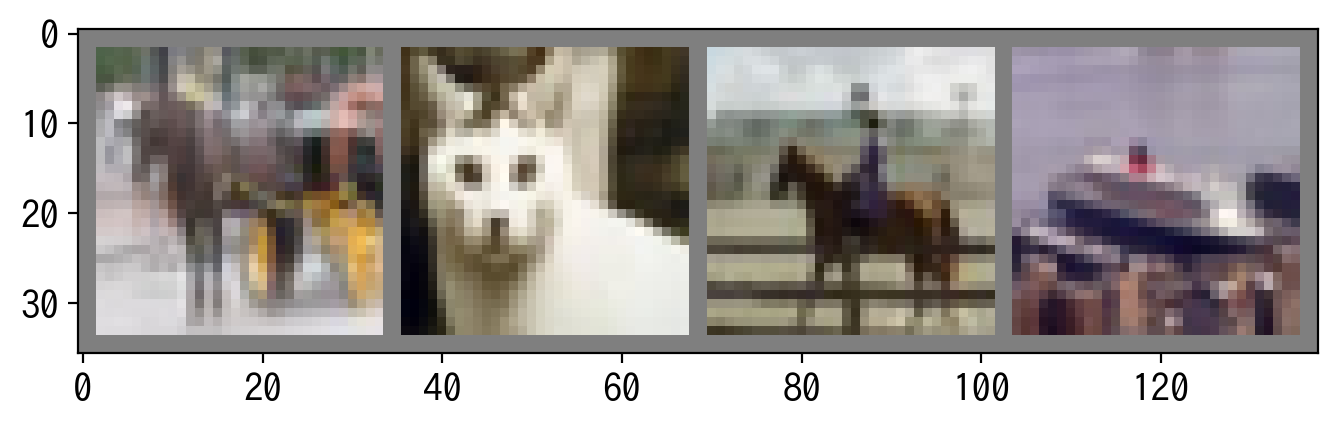

horse   cat horse  ship


In [35]:
# show images
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define a Convolutional Neural Network

前章で構築したネットワークを使用する。

ただし、入力データは3チャンネルの画像データなので、
その点だけ修正する。

In [17]:
net.pool?

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 入力は3チャンネルの画像データ
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # これもMaxPooling??
        # utilsを使用したMaxPoolingとの違いは??
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

- `trainloader`: `torch.utils.data.DataLoader`オブジェクト
    - enumerableなオブジェクト
        - `iter`関数や`enumerable`関数を使用して中身を取り出せる
    - コンストラクタの引数で`batch_size`を指定しており、そのサイズのデータが取り出される
        - この例では4つの画像データが列挙される
    - CIFAR10の訓練データは12500あるので、12500/4回列挙される。
    - `shuffle=True`としている場合、次に`enumerate`を実行すると別データが出てくる?
        - エポックごとに出てくる順番が変わる、ということ

In [25]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader, 0):
        # データを格納
        # inputsには、4つの画像データ(3x32x32)
        # labelsには正解ラベル(数値化されている)
        inputs,labels = data
        
        # 勾配をゼロクリア
        optimizer.zero_grad()
        
        # 順伝播を実行
        outputs = net(inputs)
        
        # 損失を計算
        loss = criterion(outputs, labels)
        
        # 損失を各重み行列で偏微分していく(逆伝播)
        loss.backward()
        
        # 逆伝播後は、各層の重み(parameters属性)には勾配情報が入る。
        # その購買情報から重みを更新する。
        # (optimizerインスタンス化する際に、parametersを渡しているので参照できる。)
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.190
[1,  4000] loss: 1.850
[1,  6000] loss: 1.681
[1,  8000] loss: 1.559
[1, 10000] loss: 1.485
[1, 12000] loss: 1.447
[2,  2000] loss: 1.388
[2,  4000] loss: 1.342
[2,  6000] loss: 1.331
[2,  8000] loss: 1.318
[2, 10000] loss: 1.278
[2, 12000] loss: 1.247
Finished Training


結果の保存についての詳細は
[ここ](https://pytorch.org/docs/stable/notes/serialization.html)
を参照するとよい。

In [46]:
kPATH = "./cifar_net.pth"
torch.save(net.state_dict(), kPATH)

### Test the network on the test data

In [51]:
dataiter = iter(testloader)

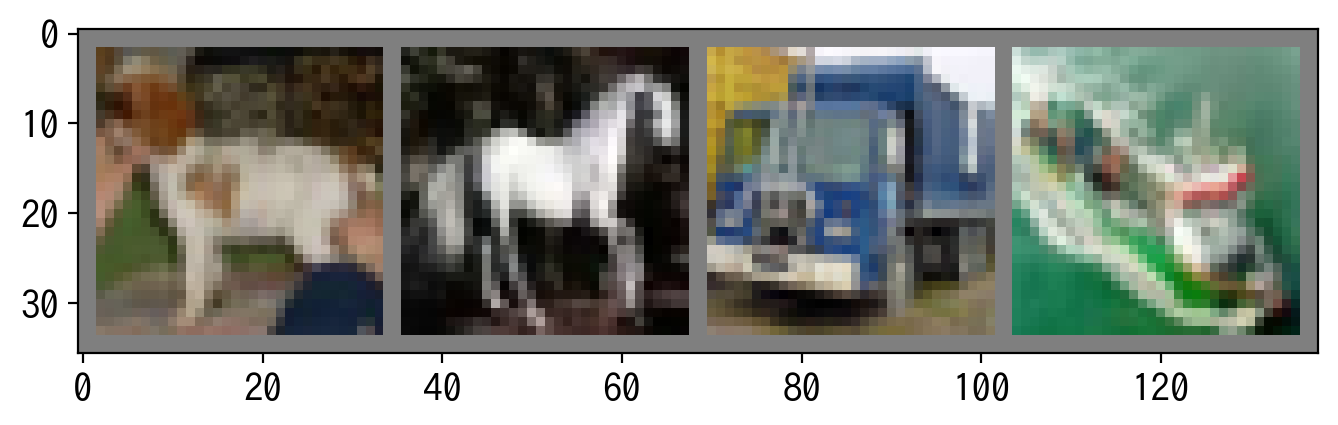

GroundTruth:    dog horse truck  ship


In [58]:
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [53]:
net = Net()
net.load_state_dict(torch.load(kPATH))

<All keys matched successfully>

In [59]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

GroundTruth:    dog horse truck  ship
Predicted:   frog horse   car  ship


In [60]:
# すべてのテストデータから正解率を求める
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' 
      % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


正解率としては50%超という結果に。

ラベル数は10個あるので、適当に当てた場合の正解率の期待値は10%となる。
それよりは遥かに高い正解率なので、ネットワークが画像を学習できていることがわかる。

しかし、正解率は半々ということなので、そんなによい結果ではない。

どのラベルが足を引っ張ってしまっているのか?

In [61]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 52 %
Accuracy of   car : 69 %
Accuracy of  bird : 26 %
Accuracy of   cat : 38 %
Accuracy of  deer : 49 %
Accuracy of   dog : 40 %
Accuracy of  frog : 70 %
Accuracy of horse : 73 %
Accuracy of  ship : 85 %
Accuracy of truck : 42 %


### Training on GPU

In [62]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


以下のメソッドを実行することで、ネットワークの重み行列やバッファ(勾配計算の)が
GPU上に送られることになる。

`net.to(device)`

また、学習のときに、以下のコードにすることで、入力データ(訓練データ)も
GPUに転送されて、計算が実行される。

`inputs,labels = data[0].to(device),data[1].to(device)`

※ `device`はcpuしか使えないときはcpuとなるので、
常に上記コードを書いておけば間違いない。